# Movie Analysis: EntertAInment Experts
**Authors:** Alec Plante, Deanna Hedges, Raul Cortez, Sunny Sanchez, Zachary Mitchell
***
<img src="images/movies1.png" width = 800 height = 600>

## Overview

a paragraph about the project

## Business Problem
describe Busiess Problem in a paragraph

## Data Understanding
describe data being used in the project (few sentences)

### Import Libraries


In [79]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import math

%matplotlib inline

### Unzip Data
This section is used to unzip data from the zippedData folder and place it into the new data folder

In [80]:
#extract im.db zip file
import zipfile
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('data/')

# unzip the gz files 
import gzip
import shutil

# unzip bom.movie_gross
with gzip.open('zippedData/bom.movie_gross.csv.gz', 'rb') as f_in:
    with open('data/bom.movie_gross.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
        
# unzip rt.movie_info.tsv
with gzip.open('zippedData/rt.movie_info.tsv.gz', 'rb') as f_in:
    with open('data/rt.movie_info.tsv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
        
# unzip rt.reviews.tsv
with gzip.open('zippedData/rt.reviews.tsv.gz', 'rb') as f_in:
    with open('data/rt.reviews.tsv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
        
# unzip tmdb.movies.csv
with gzip.open('zippedData/tmdb.movies.csv.gz', 'rb') as f_in:
    with open('data/tmdb.movies.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
        
# unzip tn.movie_budgets.csv
with gzip.open('zippedData/tn.movie_budgets.csv.gz', 'rb') as f_in:
    with open('data/tn.movie_budgets.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

### Import Data and Connect to Database

In [81]:
# import data as 
movieGross = pd.read_csv('data/bom.movie_gross.csv')
tmdbMovies = pd.read_csv('data/tmdb.movies.csv')
movieBudgets = pd.read_csv('data/tn.movie_budgets.csv')
movieInfo = pd.read_csv('data/rt.movie_info.tsv', sep = '\t', index_col = 0)
reviews = pd.read_csv('data/rt.reviews.tsv', sep = '\t', encoding= 'latin1')

In [82]:
# Connect to sql database
conn = sqlite3.connect('data/im.db')

***
### movieInfo
The movieInfo table contains basic information about the movie, including ratings, runtimes, box office sales, genres, and dates

In [83]:
# This table consists of 11 columns, listed under the 'column' below/
movieInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 146.2+ KB


In [84]:
# See the first 5 rows of the table below
movieInfo.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


***
### reviews
The reviews table provides written reviews, scores, and dates about movies

In [85]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [86]:
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


***
### movieGross
The movieGross table includes information about revenue for movies, as well as the release year and studio that created the movies

In [87]:
movieGross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [88]:
movieGross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


***
### tmdbMovies
The tmdbMovies gives genres, popularity scores, vote scores, and dates related to movies.

In [89]:
tmdbMovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [90]:
tmdbMovies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


***
### movieBudgets
This table provides information about budgets and sales of movies

In [91]:
movieBudgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [92]:
movieBudgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


***
### im.db
This database provides information regarding ratings, actors, directors, writers, and other basic information for movies.
***
<img src="images/ERD.png" alt="ERD for im.db" width="800" height="600">

In [93]:
# The table names are listed below. The columns for each table can be seen above
pd.read_sql("""
SELECT name 
FROM sqlite_master 
WHERE type = 'table';""", conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


## Data Cleaning

#### Cleaning movieInfo

In [94]:
# View how many NA values there are per column
movieInfo.isna().sum()

synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [95]:
# making a copy to clean without editing main dataframe
movieInfoClean = movieInfo.copy()

In [96]:
#finding duplicate rows
movieInfoClean.duplicated().value_counts()
movieInfoClean[movieInfoClean.duplicated(keep=False)].sort_values(by='id')

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
743,NaN,NR,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1195,NaN,NR,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1608,A group of air crash survivors are stranded in...,PG-13,Action and Adventure|Drama,NaN,Edward Burns|Scott Frank,"Dec 17, 2004","Mar 1, 2005",$,"20,900,803",112 minutes,20th Century Fox
1758,A group of air crash survivors are stranded in...,PG-13,Action and Adventure|Drama,NaN,Edward Burns|Scott Frank,"Dec 17, 2004","Mar 1, 2005",$,"20,900,803",112 minutes,20th Century Fox
1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
movieInfoClean = movieInfoClean.drop_duplicates()

In [98]:
movieInfoClean.duplicated().value_counts()

False    1556
dtype: int64

In [99]:
# changing null values for string columns to '-'
movieInfoClean['synopsis'] = movieInfoClean['synopsis'].fillna('-')
movieInfoClean['rating'] = movieInfoClean['rating'].fillna('-')
movieInfoClean['genre'] = movieInfoClean['genre'].fillna('-')
movieInfoClean['director'] = movieInfoClean['director'].fillna('-')
movieInfoClean['writer'] = movieInfoClean['writer'].fillna('-')
movieInfoClean['theater_date'] = movieInfoClean['theater_date'].fillna('-')
movieInfoClean['dvd_date'] = movieInfoClean['dvd_date'].fillna('-')
movieInfoClean['currency'] = movieInfoClean['currency'].fillna('-')
movieInfoClean['studio'] = movieInfoClean['studio'].fillna('-')


In [100]:
# changing runtime to int representing minutes, replaced null with 0
movieInfoClean['runtime']=movieInfoClean['runtime'].map(lambda x: 0 if x is np.nan else int(x.split(' ')[0]))

In [101]:
# removing commas and changing box office to a float
movieInfoClean['box_office']=movieInfoClean['box_office'].map(lambda x: 0 if x is np.nan else float(x.replace(',','')))

In [102]:
# changing theater date and dvd date to a date time type
movieInfoClean['theater_date']=movieInfoClean['theater_date'].map(lambda x: pd.to_datetime(x,format = "%b %d, %Y") if x != '-' else x)
movieInfoClean['dvd_date']=movieInfoClean['dvd_date'].map(lambda x: pd.to_datetime(x,format = "%b %d, %Y") if x != '-' else x)

In [103]:
# finding all the genres in the dataset
genres = []
for row in movieInfoClean['genre'].map(lambda x: x.split('|')):
    for genre in row:
        if genre not in genres:
            genres.append(genre)
genres
# matching genres to other datasets
genresUpdated = [['Action','Adventure'],
                 ['Classics'],
                 ['Drama'],
                 ['Science Fiction','Fantasy'],
                 ['Music'],
                 ['Mystery'],
                 ['Romance'],
                 ['Family'],
                 ['Comedy'],
                 ['-'],
                 ['Documentary'],
                 ['Special Interest'],
                 ['Art House and International'],
                 ['Horror'],
                 ['Western'],
                 ['TV Movie'],
                 ['Sports and Fitness'],
                 ['Animation'],
                 ['Faith and Spirituality'],
                 ['Cult Movies'],
                 ['Anime and Manga'],
                 ['Gay and Lesbian']
                ]
# making dict matching old genres with new
genreDict = {}
for i in range(len(genres)):
    genreDict[genres[i]]=genresUpdated[i]
# changing column to be final list of genres
finalGenres = []
for row in movieInfoClean['genre'].map(lambda x: x.split('|')):
    thisRow = []
    for genre in row:
        thisRow += genreDict[genre]
    finalGenres.append(thisRow)
movieInfoClean['genre']=finalGenres

In [104]:
movieInfoClean.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,"[Action, Adventure, Classics, Drama]",William Friedkin,Ernest Tidyman,1971-10-09 00:00:00,2001-09-25 00:00:00,-,0.0,104,-
3,"New York City, not-too-distant-future: Eric Pa...",R,"[Drama, Science Fiction, Fantasy]",David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17 00:00:00,2013-01-01 00:00:00,$,600000.0,108,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,"[Drama, Music]",Allison Anders,Allison Anders,1996-09-13 00:00:00,2000-04-18 00:00:00,-,0.0,116,-
6,Michael Douglas runs afoul of a treacherous su...,R,"[Drama, Mystery]",Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09 00:00:00,1997-08-27 00:00:00,-,0.0,128,-
7,-,NR,"[Drama, Romance]",Rodney Bennett,Giles Cooper,-,-,-,0.0,200,-


In [105]:
movieInfoClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   synopsis      1556 non-null   object 
 1   rating        1556 non-null   object 
 2   genre         1556 non-null   object 
 3   director      1556 non-null   object 
 4   writer        1556 non-null   object 
 5   theater_date  1556 non-null   object 
 6   dvd_date      1556 non-null   object 
 7   currency      1556 non-null   object 
 8   box_office    1556 non-null   float64
 9   runtime       1556 non-null   int64  
 10  studio        1556 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 145.9+ KB


In [106]:
# Create folder to store cleaned data
!mkdir cleanedData
# Export movieinfo as csv
movieInfoClean.to_csv('cleanedData/movieInfoClean.csv')

A subdirectory or file cleanedData already exists.


#### Cleaning reviews

In [107]:
# Here we confirm missing data, count and add it all up
reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [108]:
# We create a copy of the review data set which we will modify
reviews2 = reviews.copy()

In [109]:
# We fill empty reviews with unavailable chosen string by the team for consistency
reviews2[['review','rating','critic','publisher']] = reviews2[['review','rating','critic','publisher']].fillna('-')
reviews2.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,-,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,-,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,-,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,-,fresh,-,0,Cinema Scope,"October 12, 2017"


In [110]:
# Here we confirm missing data has been filled out, count and add it all up missing data, should be 0
reviews2.isna().sum()

id            0
review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64

In [111]:
# Export reviews as csv
reviews2.to_csv('cleanedData/reviewsClean.csv')

#### Cleaning movieGross

In [112]:
#view the amount of NA's for each column
movieGross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [113]:
# Converts foreign_gross column to string and removes commas
movieGross['foreign_gross'] = movieGross['foreign_gross'].astype(str).str.replace(",","")
# Converts Null values in foreign_gross column to 0
movieGross['foreign_gross'] = movieGross['foreign_gross'].replace('nan',0)
# Converts foreign_gross column from object type
movieGross['foreign_gross'] = movieGross['foreign_gross'].astype(float).astype(int)



# Converts domestic_gross column values to integers and Null values in domestic_gross column to 0
movieGross['domestic_gross'] = movieGross['domestic_gross'].fillna(0).astype(int)



# Converts year column to datetime data type
movieGross['year'] = pd.to_datetime(movieGross['year'],format = '%Y')

In [114]:
# Export movieGross as csv
movieGross.to_csv('cleanedData/movieGrossClean.csv')

#### Cleaning tmdbMovies

In [115]:
# show the amount of NA's for the tmdbMovies table
tmdbMovies.isna().sum()
# there are no missing values

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [116]:
# start by looking at the first 5 rows of data
tmdbMovies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [117]:
# View the Column names
tmdbMovies.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

At first glace, we can see that there is an extra column that matches with the index. This should be removed.

In [118]:
# Drop 'Unnamed: 0' as it contains the same information as the index
tmdbMovies.drop('Unnamed: 0', axis = 1, inplace = True)

In [119]:
# View the Column names again to confirm that changes were made
tmdbMovies.columns
# The changes have been made

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

After removing the unneeded column, the data types should be reviewed to ensure that we are able to work with the table.

In [120]:
# View the information about each column
tmdbMovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


A few columns should be investigated:
- genre_ids should be a list
- release_date should be datetime

In [121]:
# Check the type of each Column
print(f"gener_id type: {type(tmdbMovies['genre_ids'].iloc[1])}\nrelease_date type: {type(tmdbMovies['release_date'].iloc[1])}")

gener_id type: <class 'str'>
release_date type: <class 'str'>


In [122]:
# View the values in genre_ids and to get an idea with teh data we are dealing with:
print(tmdbMovies.genre_ids.value_counts())
print(f"There are {tmdbMovies['genre_ids'].isna().sum()} null values")
# There are no NA values, and they all seem to be close to lists. We can procede by changing the type to a list

[99]                      3700
[]                        2479
[18]                      2268
[35]                      1660
[27]                      1145
                          ... 
[80, 99, 18]                 1
[99, 80, 9648]               1
[18, 35, 10770, 10749]       1
[99, 18, 80]                 1
[10749, 18, 35, 9648]        1
Name: genre_ids, Length: 2477, dtype: int64
There are 0 null values


In [123]:
# Convert genre_ids into list
# ast is a library with function for us to complete this operation
import ast

#converts all strings into a list
tmdbMovies.genre_ids = tmdbMovies.genre_ids.map(lambda x: ast.literal_eval(x))

In [124]:
# make sure that rows are of type list
for i in tmdbMovies['genre_ids']:
    assert isinstance(i, list), "ERROR: element is not a list"
print("all rows in genre_ids column are of type list :^)")

all rows in genre_ids column are of type list :^)


The genre_ids in tmdbMovies are numbers, which doesn't give us a lot of information. A new column reflecting the meaning of these numbers should be created. The dictionary of the meanings is listed below:

In [125]:
genre_ids_dict={28:'Action',
                12:'Adventure',
                16:'Animation',
                35:'Comedy',
                80:'Crime',
                99:'Documentary',
                18:'Drama',
                10751:'Family',
                14:'Fantasy',
                36:'History',
                27:'Horror',
                10402:'Music',
                9648:'Mystery',
                10749:'Romance',
                878:'Science Fiction',
                10770:'TV Movie',
                53:'Thriller',
                10752:'War',
                37:'Western'}

In [126]:
# Create a new column 'genres' that is a list of the genres as strings
tmdbMovies['genres'] = tmdbMovies['genre_ids'].map(lambda x: list(pd.Series(x,dtype='float64').replace(genre_ids_dict)))
tmdbMovies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genres
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"[Adventure, Fantasy, Family]"
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[Fantasy, Adventure, Animation, Family]"
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"[Adventure, Action, Science Fiction]"
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"[Animation, Comedy, Family]"
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"[Action, Science Fiction, Adventure]"


In [127]:
print(f"The second entry in genres is of type {type(tmdbMovies['genres'].iloc[1])} and looks like: {tmdbMovies['genres'].iloc[1]}.")

The second entry in genres is of type <class 'list'> and looks like: ['Fantasy', 'Adventure', 'Animation', 'Family'].


When creating models and comparing data, it may be beneficial to have each genre as its own column with a boolean value indicating whether a given movie is of that genre.

In [128]:
# Creates a column for every value in the dictionary and returns true if that value shows up in genre_ids
for i in range(len(genre_ids_dict)):
    tmdbMovies[list(genre_ids_dict.values())[i]] = \
    (tmdbMovies['genre_ids'].map(lambda x: list(genre_ids_dict.keys())[i] in x)).astype(int)

In [129]:
# Check if the data is changed to booleans
tmdbMovies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genres,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"[Adventure, Fantasy, Family]",...,0,0,0,0,0,0,0,0,0,0
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[Fantasy, Adventure, Animation, Family]",...,0,0,0,0,0,0,0,0,0,0
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"[Adventure, Action, Science Fiction]",...,0,0,0,0,0,1,0,0,0,0
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"[Animation, Comedy, Family]",...,0,0,0,0,0,0,0,0,0,0
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"[Action, Science Fiction, Adventure]",...,0,0,0,0,0,1,0,0,0,0


Creating these columns will make it easier to sort by category, as well as give us the option to use various regression models

Now, the release_date column needs to be converted to a datetime.

In [130]:
# Investigate the types of values in the release date column
print(tmdbMovies['release_date'].value_counts())
# make sure there are no NA values
print(f"There are {tmdbMovies['release_date'].isna().sum()} null values")

2010-01-01    269
2011-01-01    200
2014-01-01    155
2012-01-01    155
2013-01-01    145
             ... 
2011-07-10      1
2016-01-02      1
2017-08-16      1
2018-11-26      1
2010-12-04      1
Name: release_date, Length: 3433, dtype: int64
There are 0 null values


In [131]:
#convert the column to datetimes
tmdbMovies['release_date'] = pd.to_datetime(tmdbMovies['release_date'])

In [132]:
# make sure that release_date is of type datetime
tmdbMovies.dtypes

genre_ids                    object
id                            int64
original_language            object
original_title               object
popularity                  float64
release_date         datetime64[ns]
title                        object
vote_average                float64
vote_count                    int64
genres                       object
Action                        int32
Adventure                     int32
Animation                     int32
Comedy                        int32
Crime                         int32
Documentary                   int32
Drama                         int32
Family                        int32
Fantasy                       int32
History                       int32
Horror                        int32
Music                         int32
Mystery                       int32
Romance                       int32
Science Fiction               int32
TV Movie                      int32
Thriller                      int32
War                         

In [133]:
# Export movieGross as csv
tmdbMovies.to_csv('cleanedData/tmdbMoviesClean.csv')

#### Cleaning movieBudgets 

In [134]:
# Preview the dataset to get a better idea of the data that we are working with
movieBudgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [135]:
movieBudgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The only problems with the dataset seem to be regarding types.
- release_date should be of type datetime
- production_budget, domestic_gross, and worldwide_gross should be of type int

In [136]:
#Convert release_date to datetime
movieBudgets["release_date"] = pd.to_datetime(movieBudgets["release_date"])

In [137]:
#for each column, remove the '$' and ',' for each entry and convert to an int
movieBudgets["production_budget"] = movieBudgets["production_budget"].str.replace('$','').str.replace(',','').astype(int)
movieBudgets["domestic_gross"]    = movieBudgets["domestic_gross"].str.replace('$','').str.replace(',','').astype(int)
movieBudgets["worldwide_gross"]   = movieBudgets["worldwide_gross"].str.replace('$','').str.replace(',','').astype(np.int64)


In [138]:
#make sure types are reflected in dataframe
movieBudgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int32         
 4   domestic_gross     5782 non-null   int32         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int32(2), int64(2), object(1)
memory usage: 226.0+ KB


In [139]:
#take a look at the new data
movieBudgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [140]:
# Export movieBudgets as csv
movieBudgets.to_csv('cleanedData/movieBudgets.csv')

## Data Analysis

***
### Popularity by Genre: 
Which Genres are the most popular?

In [9]:
#start by viewing the tmdbMovies columns
tmdbMovies.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count',
       'genres', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [10]:
# we are most interested in columns after 10, as those are the genres
tmdbMovies.columns[11:]

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

<AxesSubplot:>

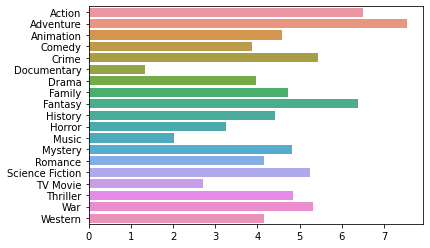

In [11]:
# create a dictionary that gets the mean popularity score for each genre
popularityByGenre = {}
for i in range(11,30):
    popularityByGenre[tmdbMovies.columns[i]] = tmdbMovies[tmdbMovies[tmdbMovies.columns[i]]==1]['popularity'].mean()

# barplot that shows popularity genre score for every genre
sns.barplot(y = list(popularityByGenre.keys()), x=list(popularityByGenre.values()))

In [12]:
# get popularity and release date for each genre
genre_dicts = {}
for i in range(11,30):
    genre_dicts[tmdbMovies.columns[i]] = tmdbMovies[tmdbMovies[tmdbMovies.columns[i]]==1][['popularity','release_date']]
#add popularity to genre_dicts to be able to see the change in popularity over years
for i in genre_dicts:
    genre_dicts[i]['year'] = pd.to_datetime(genre_dicts[i]['release_date']).dt.year

In [13]:
#view the new dictionary that contains poularity scores, release dates, and years for each movie
print(genre_dicts.keys())
genre_dicts["Action"]

dict_keys(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'])


,popularity,release_date,year
2,28.515,2010-05-07,2010
4,27.920,2010-07-16,2010
6,26.526,2009-12-18,2009
9,22.855,2010-11-04,2010
12,21.517,2010-08-03,2010
...,...,...,...
26399,0.600,2018-12-20,2018
26440,0.600,2018-01-03,2018
26479,0.600,2018-04-15,2018
26514,0.600,2018-10-01,2018


In [14]:
# use groupby and average to create an an average popularity for each year for every genre
avgPopByGenre = {}
for i in genre_dicts:
    avgPopByGenre[i] = genre_dicts[i].groupby(genre_dicts[i]['year']).mean()

In [15]:
#view new popularity dictionary
avgPopByGenre

{'Action':       popularity
 year            
 1974    9.569000
 1980   14.882000
 1982   12.063000
 1983    6.306000
 1984    7.833500
 1985    7.561000
 1986    6.852500
 1988    3.880500
 1989    1.400000
 1991   16.735750
 1993   11.485000
 1995   13.966333
 1996   10.174667
 1997   11.832500
 1998   16.487000
 2001   10.886000
 2002   15.067667
 2003    8.661000
 2004   16.482667
 2005   10.215000
 2007   15.620000
 2008    0.613000
 2009    9.651500
 2010    4.980996
 2011    5.259779
 2012    5.594142
 2013    5.574356
 2014    6.578004
 2015    6.326961
 2016    6.260686
 2017    7.906579
 2018    9.237353
 2019   10.414750,
 'Adventure':       popularity
 year            
 1961    3.454000
 1966    7.139000
 1968   23.781000
 1982   12.063000
 1985   11.657000
 1986    9.818600
 1988    6.744000
 1995   10.579000
 1996   13.860000
 1997   13.514000
 1998   15.799000
 2003    8.613000
 2004   15.203667
 2005    4.862333
 2006    1.937000
 2008    8.787000
 2009    8.353500
 201

<AxesSubplot:xlabel='year', ylabel='popularity'>

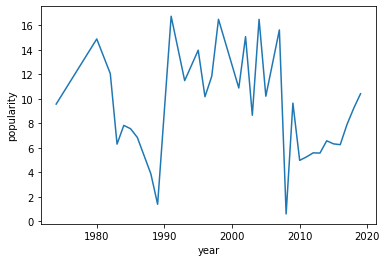

In [16]:
# view trend in popularity by genre
sns.lineplot(x = avgPopByGenre['Action'].index, y = avgPopByGenre['Action']["popularity"])

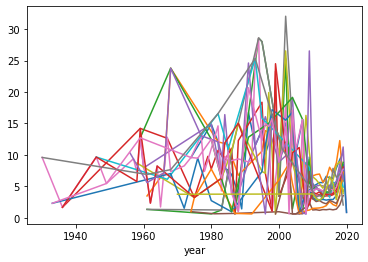

In [17]:
# Make a plot with all genre trends on one chart
for i in avgPopByGenre:
    sns.lineplot(x=avgPopByGenre[i].index, y=avgPopByGenre[i]['popularity'].values)

In [18]:
# it worked. Split into important genres. This is too busy
# We have the list of most popular genres. Lets view the top 5 most popular generes

#get list of top 5 genres
mostPopGenre = sorted(popularityByGenre, key=popularityByGenre.get, reverse=True)[:5]
mostPopGenre

['Adventure', 'Action', 'Fantasy', 'Crime', 'War']

In [19]:
# get the avergae popularity score over the past 10 years for the action genre
avgPopByGenre['Action'][avgPopByGenre['Action'].index>2009]

,popularity
year,
2010,4.980996
2011,5.259779
2012,5.594142
2013,5.574356
2014,6.578004
2015,6.326961
2016,6.260686
2017,7.906579
2018,9.237353


In [20]:
#average poularitty  for the last 10 years for every genre
popLastTenYears = {}
for genre in avgPopByGenre:
    popLastTenYears[genre] = float(avgPopByGenre[genre][avgPopByGenre[genre].index>2009].mean())

In [21]:
# Get the most popular genres in the past 10 years
mostPop10YR = sorted(popLastTenYears, key=popLastTenYears.get, reverse=True)[:5]
mostPop10YR

['Adventure', 'Action', 'Fantasy', 'Crime', 'Science Fiction']

These 2 lists share 4 categories: **'Adventure', 'Action', 'Fantasy', 'Crime'**.

It seems that war movies have lost popularity, while science fiction has taken its spot in the top 5.
**War** fell from #5 to #8
**Science Fiction** climbed from #6 to #5
The following graph will include: **['Adventure', 'Action', 'Fantasy', 'Crime','War','Science Fiction']**

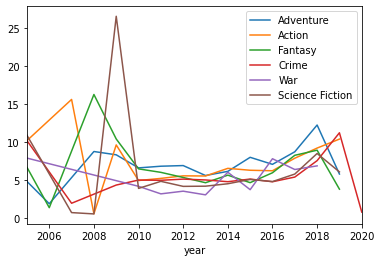

In [22]:
#plot the most popular genres on one graph.
fig, ax = plt.subplots()
ax.set_xlim(2005,2020)
for i in ['Adventure', 'Action', 'Fantasy', 'Crime','War','Science Fiction']:
    sns.lineplot(x=avgPopByGenre[i].index, y=avgPopByGenre[i]['popularity'].values)
ax.legend(['Adventure', 'Action', 'Fantasy', 'Crime','War','Science Fiction'])

The Graph above is busy. Lets seperate the lines to get a better idea

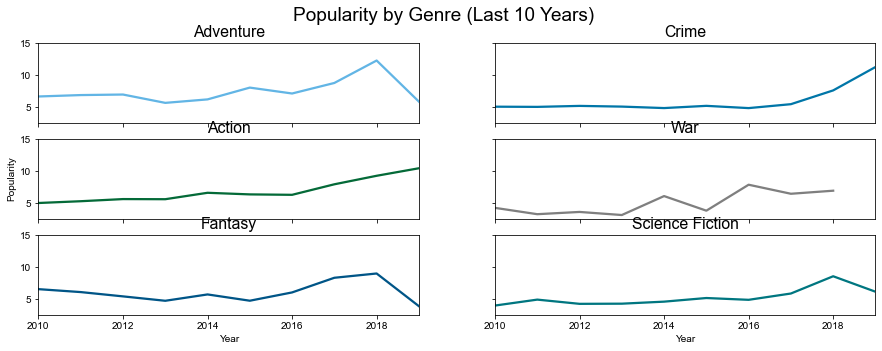

In [23]:
# Graph the most popular genres on 6 graphs on the same figure
fig, ax = plt.subplots(3,2, sharex = True, sharey=True, figsize=(15,5))

sns.set_context('talk', font_scale=.88)
fig.suptitle('Popularity by Genre (Last 10 Years)')
colors = ['#62b5e5','#046a38','#005587','#0076a8','#7f7f7f','#007680']
l = ['Adventure', 'Action', 'Fantasy', 'Crime','War','Science Fiction']
for i in range(len(l)):
    ax[int(i%3)][int(i//3)].set_xlim(2010,2019)
    ax[int(i%3)][int(i//3)].set_ylim(2.5,15)
    ax[int(i%3)][int(i//3)].set_title(l[i])
    ax[1][0].set_ylabel('Popularity')
    ax[2][0].set_xlabel('Year')
    ax[2][1].set_xlabel('Year')
    
    sns.lineplot(ax=ax[i%3][i//3], x=avgPopByGenre[l[i]].index, y=avgPopByGenre[l[i]]['popularity'].values, color=colors[i])
sns.set_style('darkgrid')

While war was not popular in the early 2010's, it has been gaining some momentum. Movies Action and crime have been increasing steadily, while the others seem more or less random. With only 10 years of data, its hard to tell where these genres are really headed

***
### Profitability By Genre (average)
This section will help determine which genres have the highest profitability.

In [24]:
#view the data we will be working with
movieInfo.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,"['Action', 'Adventure', 'Classics', 'Drama']",William Friedkin,Ernest Tidyman,1971-10-09 00:00:00,2001-09-25 00:00:00,-,0.0,104,-
1,3,"New York City, not-too-distant-future: Eric Pa...",R,"['Drama', 'Science Fiction', 'Fantasy']",David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17 00:00:00,2013-01-01 00:00:00,$,600000.0,108,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,"['Drama', 'Music']",Allison Anders,Allison Anders,1996-09-13 00:00:00,2000-04-18 00:00:00,-,0.0,116,-
3,6,Michael Douglas runs afoul of a treacherous su...,R,"['Drama', 'Mystery']",Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09 00:00:00,1997-08-27 00:00:00,-,0.0,128,-
4,7,-,NR,"['Drama', 'Romance']",Rodney Bennett,Giles Cooper,-,-,-,0.0,200,-


In [25]:
# there are only USD in this dataset. No conversions needed
movieInfo['currency'].value_counts()

-    1217
$     339
Name: currency, dtype: int64

C:\Users\aplante\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='box_office', ylabel='Density'>

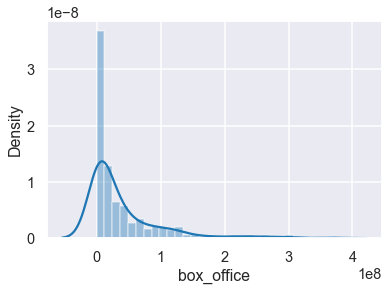

In [26]:
# Visualize the distribution of box office sales
sns.distplot(movieInfo[movieInfo['box_office']>0]['box_office'])
# There are many small numbers in box office sales.
# This resembles a power law distribution

In [27]:
# Check the type of the genre column
type(movieInfo['genre'][2])

str

The goal right now is to be able to work with the genre column. We want to create a column for each genre, where it lists true or false if the given movie is of that genre. This will make visualizations and analysis easier:

In [28]:
# The Genre column is of type string, when it should be list. 
# Changing the string to list using the code below
import ast
movieInfo.genre = movieInfo.genre.map(lambda x: ast.literal_eval(x))

In [29]:
#confirm that the change was successful
type(movieInfo['genre'][2])

list

In [30]:
# Getting a list of all the genres that show up in the genres column.
valCGenres = list(movieInfo['genre'].value_counts().index)
l = []
for i in valCGenres:
    for j in i:
        l.append(j)
genres=set(l)
print(genres)
genres = list(genres)

{'Horror', 'Action', 'Special Interest', 'Gay and Lesbian', 'Classics', 'Faith and Spirituality', 'Mystery', 'Animation', '-', 'Art House and International', 'Western', 'Science Fiction', 'Documentary', 'Comedy', 'Adventure', 'Family', 'TV Movie', 'Music', 'Romance', 'Fantasy', 'Cult Movies', 'Anime and Manga', 'Drama', 'Sports and Fitness'}


In [31]:
# Creates a column for every value in the genres list and returns true if that value shows up in the genre column
for i in range(len(genres)):
    movieInfo[genres[i]] = (movieInfo['genre'].map(lambda x: genres[i] in x).astype(int))

In [32]:
# Ensure that the change was a success
movieInfo

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,...,Adventure,Family,TV Movie,Music,Romance,Fantasy,Cult Movies,Anime and Manga,Drama,Sports and Fitness
0,1,"This gritty, fast-paced, and innovative police...",R,"[Action, Adventure, Classics, Drama]",William Friedkin,Ernest Tidyman,1971-10-09 00:00:00,2001-09-25 00:00:00,-,0.0,...,1,0,0,0,0,0,0,0,1,0
1,3,"New York City, not-too-distant-future: Eric Pa...",R,"[Drama, Science Fiction, Fantasy]",David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17 00:00:00,2013-01-01 00:00:00,$,600000.0,...,0,0,0,0,0,1,0,0,1,0
2,5,Illeana Douglas delivers a superb performance ...,R,"[Drama, Music]",Allison Anders,Allison Anders,1996-09-13 00:00:00,2000-04-18 00:00:00,-,0.0,...,0,0,0,1,0,0,0,0,1,0
3,6,Michael Douglas runs afoul of a treacherous su...,R,"[Drama, Mystery]",Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09 00:00:00,1997-08-27 00:00:00,-,0.0,...,0,0,0,0,0,0,0,0,1,0
4,7,-,NR,"[Drama, Romance]",Rodney Bennett,Giles Cooper,-,-,-,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1996,Forget terrorists or hijackers -- there's a ha...,R,"[Action, Adventure, Horror, Mystery]",-,-,2006-08-18 00:00:00,2007-01-02 00:00:00,$,33886034.0,...,1,0,0,0,0,0,0,0,0,0
1552,1997,The popular Saturday Night Live sketch was exp...,PG,"[Comedy, Science Fiction, Fantasy]",Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1993-07-23 00:00:00,2001-04-17 00:00:00,-,0.0,...,0,0,0,0,0,1,0,0,0,0
1553,1998,"Based on a novel by Richard Powell, when the l...",G,"[Classics, Comedy, Drama, Music]",Gordon Douglas,-,1962-01-01 00:00:00,2004-05-11 00:00:00,-,0.0,...,0,0,0,1,0,0,0,0,1,0
1554,1999,The Sandlot is a coming-of-age story about a g...,PG,"[Comedy, Drama, Family, Sports and Fitness]",David Mickey Evans,David Mickey Evans|Robert Gunter,1993-04-01 00:00:00,2002-01-29 00:00:00,-,0.0,...,0,1,0,0,0,0,0,0,1,1


We successfully created boolean columns for the genres. Now we may begin data analysis. 

Lets start by looking to see the **median box office revenue** for every genre:

In [33]:
#create dictionary that shows median box office for every genre 
genre_dict2={}
for i in genres:
    genre_dict2[i] = movieInfo[(movieInfo[i]==1) & (movieInfo['box_office']>1)]['box_office'].astype(int).median()

In [34]:
# view this new dictionary
genre_dict2

{'Horror': 19755422.0,
 'Action': 36282491.0,
 'Special Interest': 308164.0,
 'Gay and Lesbian': nan,
 'Classics': 6750000.0,
 'Faith and Spirituality': 4894004.0,
 'Mystery': 17230619.5,
 'Animation': 42194060.0,
 '-': nan,
 'Art House and International': 1089802.0,
 'Western': 7200000.0,
 'Science Fiction': 33075902.0,
 'Documentary': 419361.0,
 'Comedy': 17364602.0,
 'Adventure': 36282491.0,
 'Family': 39764012.0,
 'TV Movie': 2927972.0,
 'Music': 4894004.0,
 'Romance': 22701447.5,
 'Fantasy': 33075902.0,
 'Cult Movies': 13900000.0,
 'Anime and Manga': nan,
 'Drama': 8518148.0,
 'Sports and Fitness': 21241679.0}

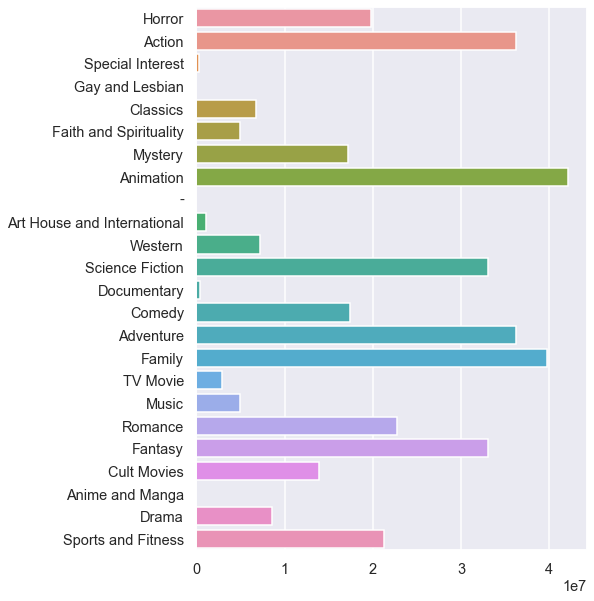

In [35]:
# There are nan values in this, likely because those genres had no recorded revenue
# For now, we will leave them in the dataset. We will remove later

# Graph the median box office sales for each genre
fig, ax = plt.subplots(figsize=(7,10))
sns.barplot(y = list(genre_dict2.keys()), x=list(genre_dict2.values()))
plt.show()

This bargrraph shows good information. Now lets clean it up to select only the genres with 25 or more recorded box office sales in the database

In [36]:
# Creating a dictionary that shows the number of genres with recorded box office sales for each genre
genre_dict_len={}
for i in genres:
    genre_dict_len[i] = len(movieInfo[(movieInfo[i]==1) & (movieInfo['box_office']>1)]['box_office'])

# Create a second Genre Length dictionary for items with over 24 recorded box office sales instances
gdl2 = {k:v for (k,v) in genre_dict_len.items() if v>25}

In [37]:
# Create a new dictionary from the ones above that shows median box office sales 
# for films with over 24 recorded box office sales instances 
avgRevforPopularGenres = {k:v for (k,v) in genre_dict2.items() if k in gdl2.keys()}

# sort the values
avgRevforPopularGenres = {k:v for k,v in sorted(avgRevforPopularGenres.items(), key=lambda item: item[1], reverse = True)}


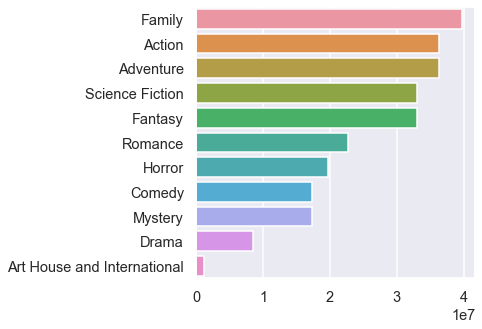

In [38]:
# Plot the median box office sales for films with over 24 recorded box office sales instances
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(y = list(avgRevforPopularGenres.keys()), x=list(avgRevforPopularGenres.values()))
plt.show()

The box plot above shows that Family films has the highest median profit, followed by Action and Adventure, then Fantasy and Science Fiction.

### Runtime and sales
We are going to investigate the effect that box runtime has on box office sales.

In [39]:
# View both columns
movieInfo['runtime'].head()
movieInfo['box_office'].head()

0         0.0
1    600000.0
2         0.0
3         0.0
4         0.0
Name: box_office, dtype: float64

In [40]:
# Create new table that only includes rows with recorded sales
sales = movieInfo[movieInfo['box_office']>0]

# Check to ensure there are no 0s
sales['box_office']

1         600000.0
6       41032915.0
7         224114.0
8         134904.0
15       1039869.0
           ...    
1538    25335935.0
1539     1416189.0
1541       59371.0
1542      794306.0
1551    33886034.0
Name: box_office, Length: 339, dtype: float64

<AxesSubplot:xlabel='runtime', ylabel='box_office'>

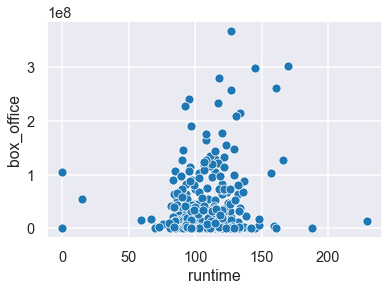

In [41]:
# Create a scatterplot to visualize the relationship between box office sales and runtime
sns.scatterplot(x=sales['runtime'], y=sales['box_office'])
# There looks to be little correlation.

It looks like there is little correlation between run time and box office sales. This relationship should not be viewed any longer

### Gross Income by Year
We will view how the gross income has changed across years

In [42]:
# View the table we are 
movieGross.head()

,Unnamed: 0,title,studio,domestic_gross,foreign_gross,year
0,0,Toy Story 3,BV,415000000,652000000,2010-01-01
1,1,Alice in Wonderland (2010),BV,334200000,691300000,2010-01-01
2,2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010-01-01
3,3,Inception,WB,292600000,535700000,2010-01-01
4,4,Shrek Forever After,P/DW,238700000,513900000,2010-01-01


In [43]:
# Change the year column to a data time, and take the median for the
movieGross['year'] = pd.to_datetime(movieGross['year']).dt.year
dgByYear = movieGross['domestic_gross'].groupby(movieGross['year']).median()

<AxesSubplot:xlabel='year', ylabel='domestic_gross'>

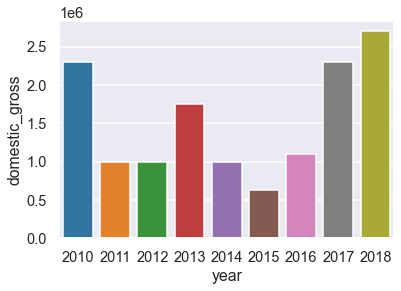

In [44]:
#plot the distribution
sns.barplot(x = dgByYear.index, y=dgByYear)

There is no clear relationship between year and median gross revenue. This distribution is still interesting to see.

### Return on Investment by Month of Release
We will determine if there is a relationship between Return on Investment (ROI) and the month a movie is released.

                        ROI(%) = profit/cost = (revenue-cost)/cost

In [45]:
# Making new column for Return on investment
#ROI = profit / cost
movieBudgets['ROI']=(movieBudgets['worldwide_gross']-movieBudgets['production_budget'])/movieBudgets['production_budget']*100

In [46]:
# Check if the column was created and the numbers are reasonable
movieBudgets

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,0,1,2009-12-18,Avatar,425000000,760507625,2776345279,553.257713
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286
2,2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-57.210757
3,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139
4,4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636
...,...,...,...,...,...,...,...,...
5777,5777,78,2018-12-31,Red 11,7000,0,0,-100.000000
5778,5778,79,1999-04-02,Following,6000,48482,240495,3908.250000
5779,5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-73.240000
5780,5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,-100.000000


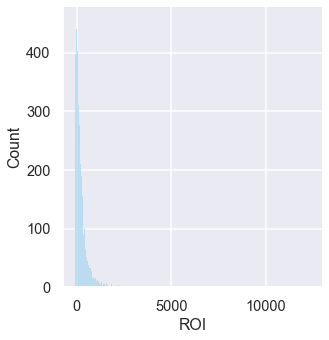

In [87]:
#lets view the distribution of ROI to get a beetter understanding of the data
sns.displot(movieBudgetsAdj['ROI'])
#This resembles a power law distribution, where most ROI values are around 0

In [47]:
# To analyze by month and year, we need to convert teh relase date into a data time
# Then, we need to make a month column. I added a year in case we want to analyze further
movieBudgets['release_date'] = pd.to_datetime(movieBudgets['release_date'])
movieBudgets['month'] = movieBudgets['release_date'].dt.month
movieBudgets['year'] = movieBudgets['release_date'].dt.year
movieBudgets.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,month,year
0,0,1,2009-12-18,Avatar,425000000,760507625,2776345279,553.257713,12,2009
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,5,2011
2,2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-57.210757,6,2019
3,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139,5,2015
4,4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636,12,2017


27984448.5

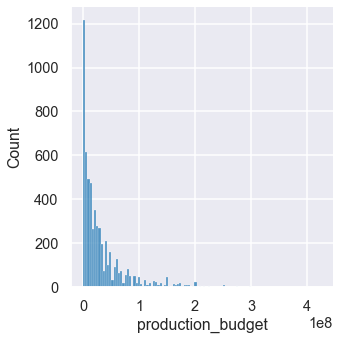

In [48]:
# Create a distribution plot to visualize the distribution of production budget 
# This should inform the insights we find
sns.displot(movieBudgets['production_budget'])
movieBudgets['production_budget'].median()
movieBudgets['worldwide_gross'].median()

In [49]:
# only want ot select movies with bigger budgets and revenue. 
movieBudgets[(movieBudgets['production_budget']>1000000) & (movieBudgets['worldwide_gross']>1000000)]

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,month,year
0,0,1,2009-12-18,Avatar,425000000,760507625,2776345279,553.257713,12,2009
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,5,2011
2,2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-57.210757,6,2019
3,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139,5,2015
4,4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636,12,2017
...,...,...,...,...,...,...,...,...,...,...
5195,5195,96,2012-03-23,Serbuan maut,1100000,4105123,9297407,745.218818,3,2012
5196,5196,97,1986-09-26,Down by Law,1100000,1436000,1436000,30.545455,9,1986
5197,5197,98,1987-09-04,The Offspring,1100000,1355728,1355728,23.248000,9,1987
5208,5208,9,2009-12-11,Rocket Singh: Salesman of the Year,1070000,164649,5348767,399.884766,12,2009


<AxesSubplot:xlabel='month', ylabel='ROI'>

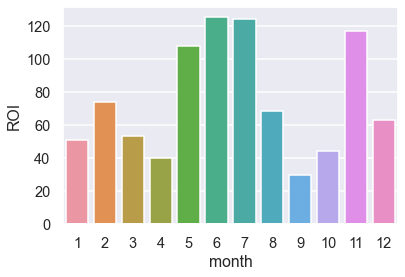

In [50]:
# Create a Series that lists the median ROI based on the month
medianByMonth = movieBudgets['ROI'].groupby(movieBudgets['month']).median()

# Show the distribution of median ROI by month.
sns.barplot(x=medianByMonth.index, y=medianByMonth)
# There seems to be a clear difference between ROI and month

Text(0, 0.5, 'Return on Investment (%)')

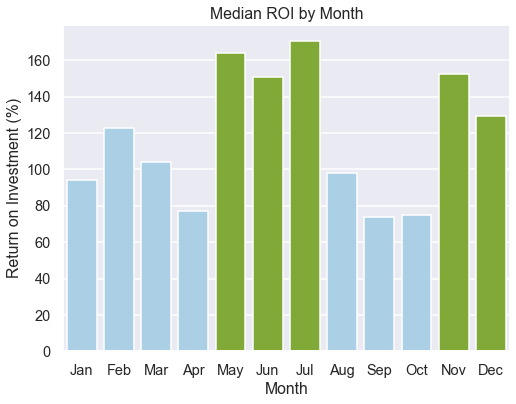

In [54]:
# We are going to use this in out presentation so lets make it look nice

# movieBudgetAdj to select only movies with large budgets and revenue
movieBudgetsAdj = movieBudgets[(movieBudgets['production_budget']>1000000) & (movieBudgets['worldwide_gross']>1000000)]

# take the median ROI by month
medianByMonthAdj = movieBudgetsAdj['ROI'].groupby(movieBudgetsAdj['month']).median()

#set ip chart
fig, ax = plt.subplots(figsize = (8,6))
# set title of chart
ax.set_title('Median ROI by Month')
# set colors to emphasize the important months
col = ['#A1D3EF','#A1D3EF','#A1D3EF','#A1D3EF','#86bc25','#86bc25','#86bc25','#A1D3EF','#A1D3EF','#A1D3EF','#86bc25','#86bc25']
sns.set_palette(sns.color_palette(col))
# Create and label the plot
sns.barplot(x=medianByMonthAdj.index, y=medianByMonthAdj)
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.set_xlabel('Month')
ax.set_ylabel('Return on Investment (%)')

This visulaization is great to describe the optimal time to relase a movie. Lets make more:

<AxesSubplot:xlabel='month', ylabel='ROI'>

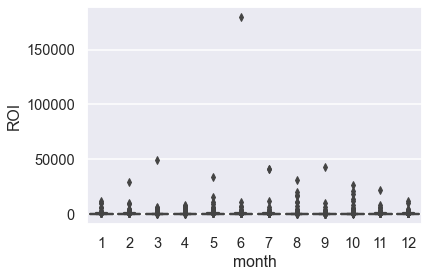

In [72]:
# Create a boxplot Distribtion of ROI to get a better idea of mins, maxes, and quartiles
sns.boxplot(x=movieBudgets['month'], y=movieBudgets['ROI'])
# This does not show a lot, lets change the y limits

Text(0, 0.5, 'Return on Investment')

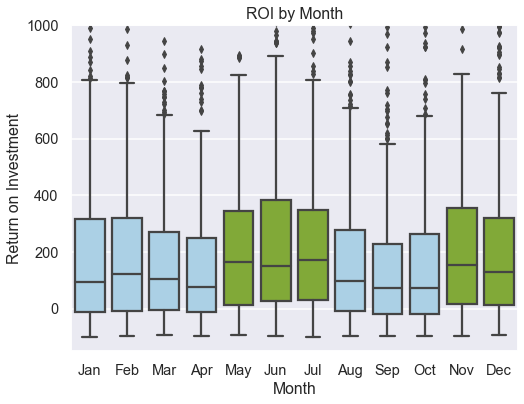

In [73]:
# Create a stacked boxplot chart to show the distribution of ROI for each genre
fig, ax = plt.subplots(figsize = (8,6))
ax.set_ylim(-150,1000)
ax.set_title("ROI by Month")
sns.boxplot(x=movieBudgetsAdj['month'], y=movieBudgetsAdj['ROI'])
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.set_xlabel('Month')
ax.set_ylabel('Return on Investment')

In [74]:
julyMedian = medianByMonthAdj[7]
TotalMedian = movieBudgetsAdj['ROI'].median()

ROI seems to be higher in the green months. Lets try to find out why. Viewing the **mean production budget** may give us some insight

Text(0, 0.5, 'Production Budget (in Millions of $)')

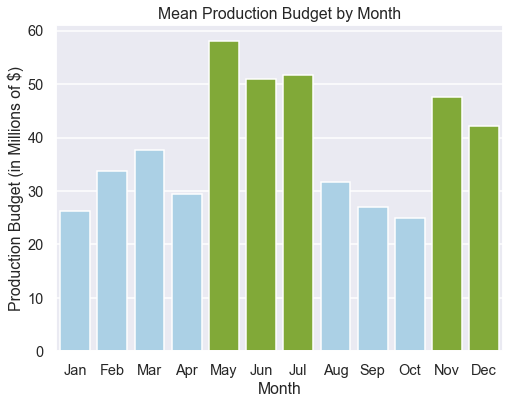

In [75]:
# get mean budget by month
meanBudgetByMonthAdj = movieBudgets['production_budget'].groupby(movieBudgetsAdj['month']).mean()

# Create and format graph
fig, ax = plt.subplots(figsize = (8,6))
ax.set_title('Mean Production Budget by Month')
col = ['#A1D3EF','#A1D3EF','#A1D3EF','#A1D3EF','#86bc25','#86bc25','#86bc25','#A1D3EF','#A1D3EF','#A1D3EF','#86bc25','#86bc25']
sns.set_palette(sns.color_palette(col))
sns.barplot(x=meanBudgetByMonthAdj.index, y=meanBudgetByMonthAdj/1000000)
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.set_xlabel('Month')
ax.set_ylabel('Production Budget (in Millions of $)')

Text(0, 0.5, 'Production Budget')

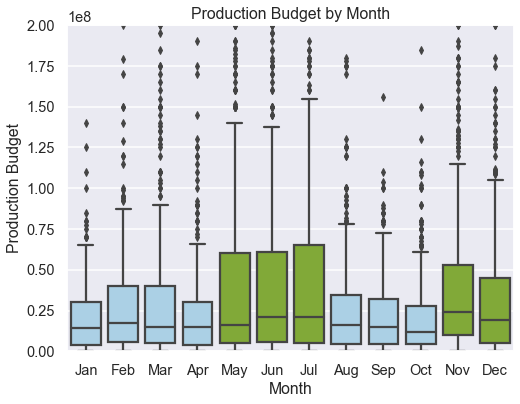

In [76]:
# Create a stacked boxplot chart to show the distribution of Production budget for each genre
fig, ax = plt.subplots(figsize = (8,6))
ax.set_ylim(-150,200000000)
ax.set_title("Production Budget by Month")
sns.boxplot(x=movieBudgets['month'], y=movieBudgets['production_budget'])
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.set_xlabel('Month')
ax.set_ylabel('Production Budget')

The Production Budget is also higher, which means that they likely put more effort into those movies. Lets also view the gross earnings by month:

Text(0, 0.5, 'Gross Earnings')

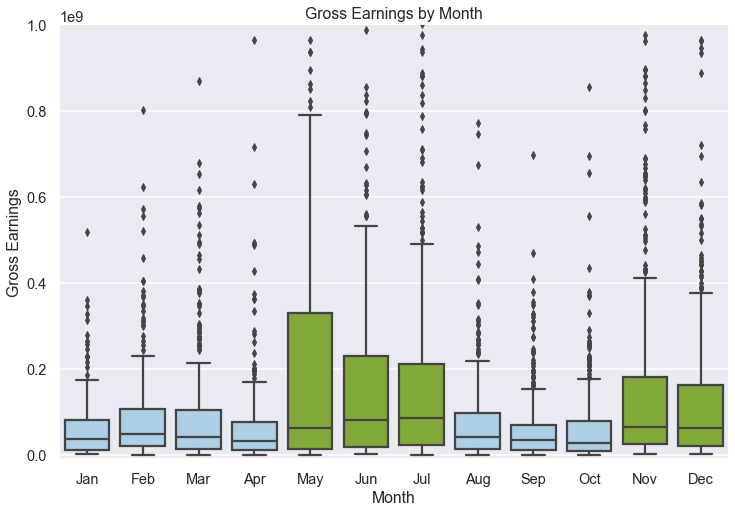

In [77]:
movieBudgetsAdj = movieBudgets[(movieBudgets['production_budget']>1000000) & (movieBudgets['worldwide_gross']>1000000)]
fig, ax = plt.subplots(figsize = (12,8))
ax.set_ylim(-10000000,1000000000)
ax.set_title("Gross Earnings by Month")
sns.boxplot(x=movieBudgetsAdj['month'], y=movieBudgetsAdj['worldwide_gross'])
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.set_xlabel('Month')
ax.set_ylabel('Gross Earnings')

This distribution is very similar to the last two.

Finally, we will run statistical tests to ensure that this relationship is significant. We will start with a t-test:

**H0:** July mean ROI  <=  Population mean ROI

**H1:** July mean ROI > Population mean ROI

In [91]:
# Create a function to run a t-test on some data given the information
def one_sample_ttest(sample, popmean, alpha):

    # Visualize sample distribution for normality 
    sns.displot(sample)
    
    # Population mean 
    mu = popmean
    
    # Sample mean (x̄) using NumPy mean()
    xbar = np.mean(sample)
    n = len(sample)
    
    # Sample Standard Deviation (sigma) using Numpy
    s = np.std(sample, ddof = 1)
    
    # Degrees of freedom
    df = n-1
    
    # Calculate the critical t-value
    t_crit = stats.t.ppf(1-alpha, df=df)
    
    # Calculate the results     
    results = stats.ttest_1samp(a=sample, popmean=mu)   
    # return results
    return results

Ttest_1sampResult(statistic=1.2481258704995004, pvalue=0.2128052327899593)

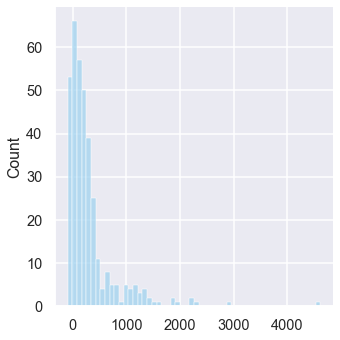

In [92]:
julyROI = list(movieBudgetsAdj[movieBudgetsAdj['month']==7]['ROI'])
mu=movieBudgetsAdj['ROI'].mean()
alpha=.9
one_sample_ttest(julyROI, mu, alpha)

The P value for this test is only .21, which means we can reject the null hypothesis with 79% certainty. This is not great. We cannot comfortably say that the July mean ROI is significantly different.

This is not the end of our tests. We can still prove something else. In this case, we can use an ANOVA to prove that the means for all months are not equal. We will choose an alpha value of .9

**H0:** The mean ROI is equal across all months
**H1:** The mean ROI is not equal across all months (at least one month is not the same as another)

In [93]:
di = {}
for i in range(1,13):
    di[i]=movieBudgetsAdj[movieBudgetsAdj['month']==i]['ROI']
    di[i] = list(di[i].values)
stats.f_oneway(di[1],di[2],di[3],di[4],di[5],di[6],di[7],di[8],di[9],di[10],di[11],di[12])

F_onewayResult(statistic=1.7831764145772773, pvalue=0.05125699045835469)

In [95]:
# Alternatively
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform ANOVA
mbCat = movieBudgetsAdj.copy()
mbCat['month'] = mbCat['month'].astype(str)

model = ols('ROI ~ C(month)', data=mbCat).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(month),7.676880e+06,11.0,1.783176,0.051257
Residual,1.786646e+09,4565.0,NaN,NaN


In [99]:
mbCat['month'].value_counts()

12    552
10    448
11    425
6     400
8     386
9     376
3     375
7     357
4     353
5     326
2     313
1     266
Name: month, dtype: int64

The p-value of this test is .051. This means that with about 95% certiainty, we can say that the mean ROI differes significantly between months. This is great news, as it statistically proves the impact of month on ROI

Below, we will use some statistical methods to create models to try to predict ROI and Box Office Sales, respectively.

In [101]:
# Run Regression model, Trying to use the month of the year to predict ROI 
mod = ols(formula='ROI ~ month', data = mbCat)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROI   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.783
Date:                Thu, 27 Oct 2022   Prob (F-statistic):             0.0513
Time:                        17:21:48   Log-Likelihood:                -35958.
No. Observations:                4577   AIC:                         7.194e+04
Df Residuals:                    4565   BIC:                         7.202e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     232.0928     38.358      6.051      

The P value for each month can be seen in the P>|t| column. No months have prediction capabilities with a p value less than .05. However, the p-value does reveal which months have the most certian effect on ROI, indicated by the lowest p-values. The coefficeint reveal the strength of the relationship between ROI and month, as well as the direction. The higher the coefficient, the greater impact the month has on ROI. Months with negative coefficeints decrease ROI.  



In [108]:
# Build a regression model to predict box office sales based on runtime, rating, and genre.
cleanMI = movieInfo[(movieInfo['runtime']>30)& (movieInfo['box_office']>0)]
mod = ols(formula='box_office ~ runtime + rating + Documentary + Q("Art House and International") + Western +\
    Horror + Q("Cult Movies") + Action + Q("TV Movie") + Comedy + Mystery + Q("Faith and Spirituality") +\
    Classics + Fantasy + Q("Special Interest") + Drama + Animation + Q("Anime and Manga")+\
    Q("Gay and Lesbian") + Family  + Music + Romance + Q("Sports and Fitness")', data = cleanMI)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             box_office   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     5.218
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           4.09e-13
Time:                        17:31:13   Log-Likelihood:                -6421.6
No. Observations:                 336   AIC:                         1.290e+04
Df Residuals:                     310   BIC:                         1.299e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

Some interesting observations can be seen:
- unrated movies have a large negative effect on the sales (makes sense because likely smaller)
- greater runtime indicated more sales. This is likely because movies with very small run time do not do well (Coeff = 9.975e+05 ; p = 0.0)
- Art House and International perform poorly (Coeff = -1.74e+07 ; p = 0.081)
- Western Movies Perform Poorly (Coeff = -3.773e+07 ; p = 0.076)
- Action movies sell well (Coeff = 2.005e+07 ; p = 0.009) (very strong relationship)
- Classics Perform Poorly (Coeff = -9.378e+07 ; p = 0.014) (strong relationship)
- Fantasy Performs Well (Coeff = 2.114e+07 ; p = 0.048) (strong relationship)
- Drama performs poorly (Coeff = -1.936e+07 ; p = 0.006)

While ROI and Sales are hard to predict, trying to predict them gave some interesting insights

### Finding Top 50 Profitable Movies in MovieInfo

In [5]:
# Convert genre_ids into list
#library with function for us to complete this operation
import ast
#converts all strings into a list
movieInfo.genre = movieInfo.genre.map(lambda x: ast.literal_eval(x))

In [6]:
# copy dataframe for safety and ease
mi = movieInfo.copy()

In [7]:
# make sub dataframe uf the top 50 movies
top_mi = mi.sort_values(by=['box_office'],ascending=False)[0:50]
top_mi

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1071,This depiction of the last 12 hours in the lif...,R,[Drama],Mel Gibson,Mel Gibson|Benedict Fitzgerald,2004-02-25 00:00:00,2004-08-31 00:00:00,$,368000000.0,127,Newmarket Film Group
1136,The Hobbit: An Unexpected Journey follows titl...,PG-13,"[Action, Adventure, Science Fiction, Fantasy]",Peter Jackson,Peter Jackson|Philippa Boyens|Guillermo del To...,2012-12-14 00:00:00,2013-03-19 00:00:00,$,303001229.0,170,Warner Bros.
1525,"In Skyfall, Bond's loyalty to M is tested as h...",PG-13,"[Action, Adventure, Mystery]",Sam Mendes,John Logan|Robert Wade|Neal Purvis,2012-11-09 00:00:00,2013-03-11 00:00:00,$,299300000.0,145,MGM
883,"Now that Greg Focker is ""in"" with his soon-to-...",PG-13,[Comedy],Jay Roach,Jim Herzfeld|John Hamburg,2004-12-22 00:00:00,2005-04-26 00:00:00,$,279167575.0,118,Universal Pictures
1442,Youthful wizard Harry Potter returns to the sc...,PG,"[Family, Science Fiction, Fantasy]",Chris Columbus,Steve Kloves,2002-11-15 00:00:00,2003-04-11 00:00:00,$,261835892.0,161,Warner Bros. Pictures
1255,Mission: Impossible III director and Alias cre...,PG-13,"[Action, Adventure, Drama, Science Fiction, Fa...",-,Gene Roddenberry|Alex Kurtzman|Roberto Orci,2009-05-07 00:00:00,2009-11-17 00:00:00,$,257704099.0,127,IMAX
661,One woman's rocky road to the altar gets playe...,PG,"[Comedy, Romance]",Joel Zwick,Nia Vardalos,2002-04-19 00:00:00,2003-02-11 00:00:00,$,241250669.0,95,IFC Films
841,This is a contemporary retelling of H.G. Wells...,PG-13,"[Action, Adventure, Science Fiction, Fantasy]",Steven Spielberg,Josh Friedman|David Koepp,2005-06-29 00:00:00,2005-11-22 00:00:00,$,234141872.0,117,Paramount Pictures
1877,A hard-drinking lush finds himself thrust into...,PG-13,"[Action, Adventure, Comedy, Drama]",Peter Berg,Vincent Gilligan|Vince Gilligan|Vy Vincent Ngo,2008-06-16 00:00:00,2008-11-25 00:00:00,$,227946274.0,92,Columbia Pictures


Identifying and charting top genres

In [8]:
# make list and frequency distribution of top genres
top_genres=[]
for genres in top_mi['genre']:
    top_genres += genres
genre_freq = {}
for g in top_genres:
    if g not in genre_freq.keys():
        genre_freq[g] = 1
    else:
        genre_freq[g] += 1


<AxesSubplot:title={'center':'Genres in Top 50 Movies'}, xlabel='Genres', ylabel='Number of Movies'>

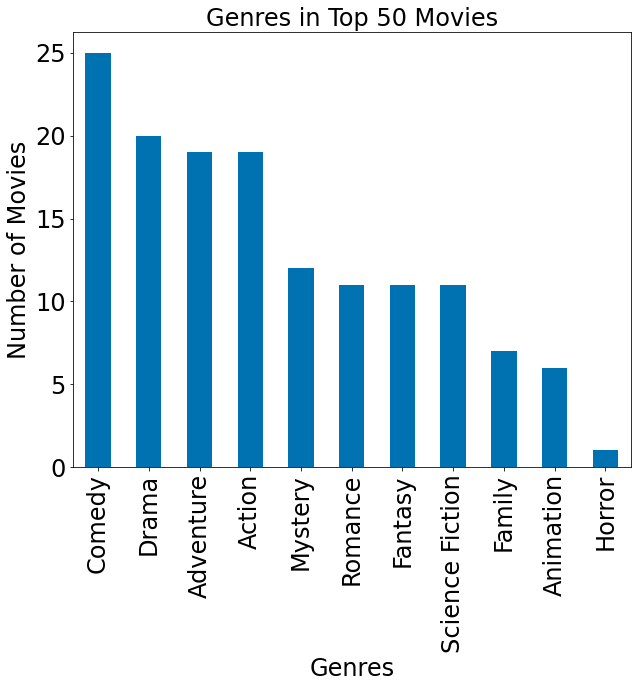

In [9]:
chart_genre = pd.Series(genre_freq)
chart_genre = chart_genre.sort_values(ascending = False)
chart_genre.plot(kind = 'bar', 
                 title = 'Genres in Top 50 Movies',
                 xlabel="Genres",
                 ylabel='Number of Movies',
                 fontsize=24)

Comparing top genres to genres of all movies

In [11]:
# make list and frequency distribution of all genres
all_genres=[]
for genres in mi['genre']:
    if '-' not in genres:
        all_genres += genres
genre_freq_all = {}
for g in all_genres:
    if g not in genre_freq_all.keys():
        genre_freq_all[g] = 1
    else:
        genre_freq_all[g] += 1        
abb_genres = ['Act',
              'Adv',
              'Anim',
              'Anime',
              'Art',
              'Class',
              'Com',
              'Cult',
              'Doc',
              'Drama',
              'Faith',
              'Fam',
              'Fant',
              'LGBTQ+',
              'Hor',
              'Mus',
              'Myst',
              'Rom',
              'Sci-Fi',
              'Sp Int',
              'Sports',
              'TV',
              'West'
             ]
genre_keys = sorted(list(set(all_genres)))
genre_legend={}
for i in range(len(genre_keys)):
    genre_legend[genre_keys[i]]=abb_genres[i]


<AxesSubplot:title={'center':'Genres in All Movies'}, xlabel='Genres', ylabel='Number of Movies'>

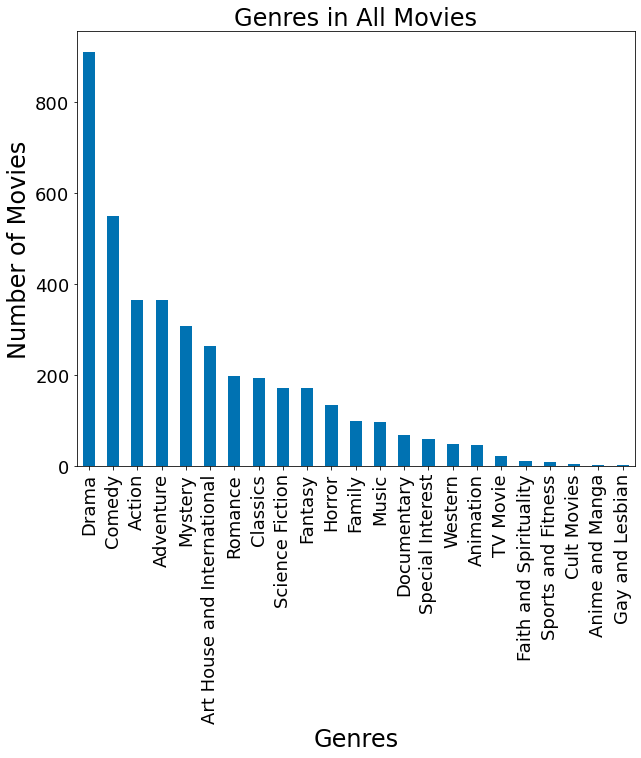

In [10]:
all_genre = pd.Series(genre_freq_all)
chart_genre_all = all_genre.sort_values(ascending = False)
chart_genre_all.plot(kind = 'bar', 
                     title = 'Genres in All Movies',
                     xlabel="Genres",
                     ylabel='Number of Movies',
                     fontsize=18)

Finding most common combos of genres

In [19]:
# make frequency distribution of all genre combos
genre_combos = mi['genre']
genre_combos = genre_combos.map(lambda x: ', '.join([genre_legend[i]for i in x if i != '-']))
genre_combo_freq = {}
for g in genre_combos:
    if g not in genre_combo_freq.keys():
        genre_combo_freq[g] = 1
    else:
        genre_combo_freq[g] += 1


<AxesSubplot:title={'center':'Common Genre Combinations in All Movies'}, ylabel='Genres'>

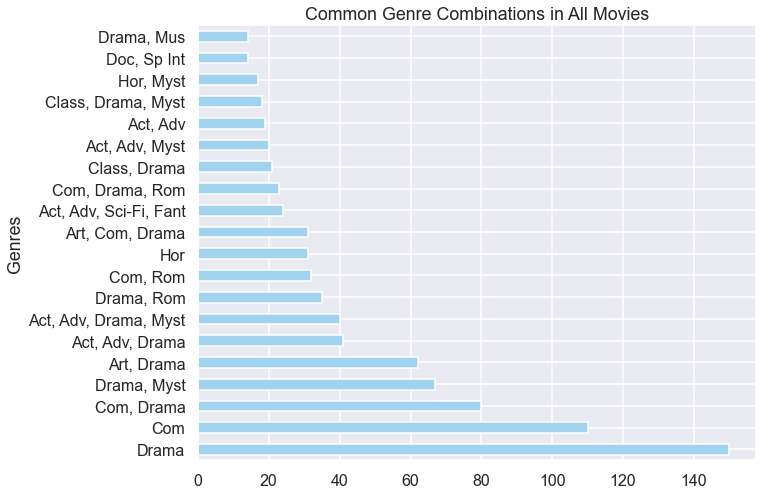

In [20]:
chart_combos = pd.Series(genre_combo_freq)
chart_combos = chart_combos.sort_values(ascending = False)[:20]
# chart_combos = chart_combos.sort_values(ascending = True)
chart_combos.plot(kind = 'barh', 
                  title = 'Common Genre Combinations in All Movies',
                  xlabel="Genres",
                  ylabel='Number of Movies',
                  fontsize=16)

Making final visualization with color coding to emphasize the science fiction and fantasy genres

Text(0, 0.5, 'Genres')

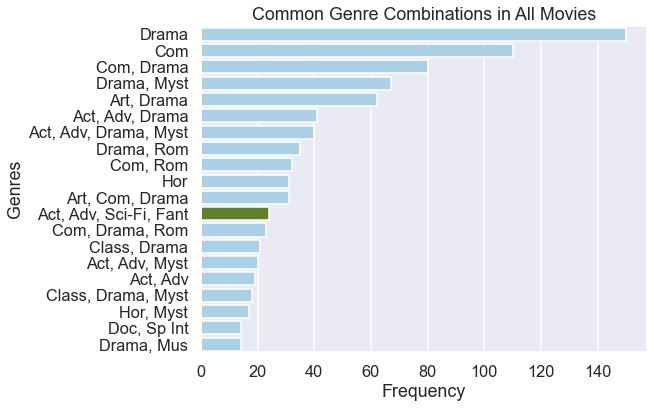

In [21]:
# using seaborn to make style consistent with other group members' charts
fig, ax = plt.subplots(figsize = (8,6))
sns.set_context('talk',font_scale=.99)
sns.set_style('darkgrid')
ax.set_title('Common Genre Combinations in All Movies')
# color coding the sci fi fantasy movies
col = ['#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#648D1C',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF']
sns.set_palette(sns.color_palette(col))
sns.barplot(y=chart_combos.index,x=chart_combos)
ax.set_xlabel('Frequency')
ax.set_ylabel('Genres')

In [23]:
# make frequency distribution of top genre combos
top_combos = top_mi['genre']
top_combos = top_combos.map(lambda x: ', '.join([genre_legend[i]for i in x if i != '-']))
top_combo_freq = {}
for g in top_combos:
    if g not in top_combo_freq.keys():
        top_combo_freq[g] = 1
    else:
        top_combo_freq[g] += 1

<AxesSubplot:title={'center':'Genre Combinations in Top 50 Movies'}, ylabel='Genres'>

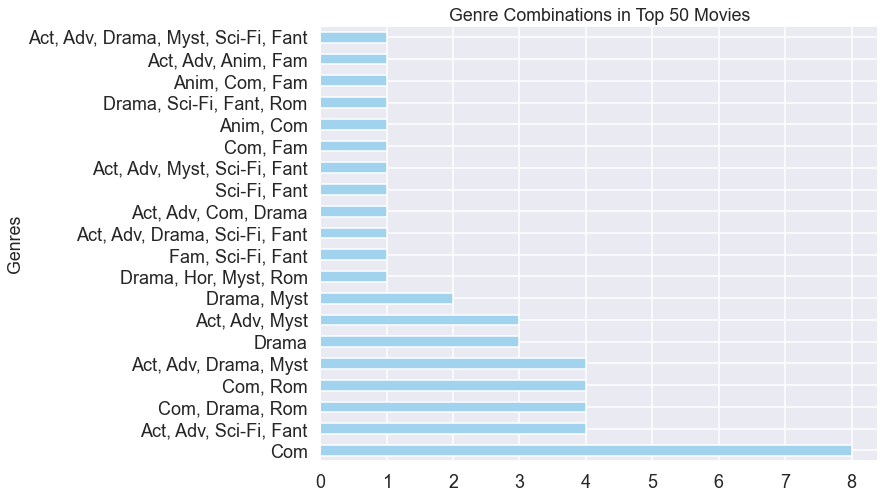

In [24]:
chart_combos_top = pd.Series(top_combo_freq)
chart_combos_top = chart_combos_top.sort_values(ascending = False)[:20]
# chart_combos_top = chart_combos_top.sort_values(ascending = True)
chart_combos_top.plot(kind = 'barh', 
                      title = 'Genre Combinations in Top 50 Movies',
                      xlabel="Genres",
                      ylabel='Number of Movies',
                      fontsize=18)

Making final visualization with color coding to emphasize the science fiction and fantasy genres

Text(0, 0.5, 'Genres')

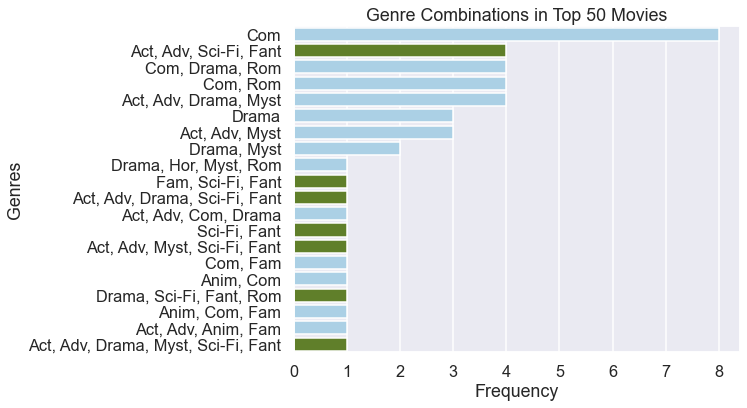

In [25]:
# using seaborn to make style consistent with other group members' charts
fig, ax = plt.subplots(figsize = (8,6))
sns.set_context('talk',font_scale=.99)
sns.set_style('darkgrid')
ax.set_title('Genre Combinations in Top 50 Movies')
# color coding the sci fi fantasy movies
col = ['#A1D3EF',
       '#648D1C',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#648D1C',
       '#648D1C',
       '#A1D3EF',
       '#648D1C',
       '#648D1C',
       '#A1D3EF',
       '#A1D3EF',
       '#648D1C',
       '#A1D3EF',
       '#A1D3EF',
       '#648D1C']
sns.set_palette(sns.color_palette(col))
sns.barplot(y=chart_combos_top.index,x=chart_combos_top)
ax.set_xlabel('Frequency')
ax.set_ylabel('Genres')

### Exploring Common Words in Descriptions of Top 50 Films

In [30]:
# importing Natural Language Toolkit for tokenization
import nltk
nltk.download("stopwords")
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhedges\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dhedges\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
# making list of words in the synopses of top 50 movies
top_corpus = []
for i in range(50):
    top_corpus += word_tokenize(top_mi['synopsis'].iloc[i])
    
# excluding common stop words and punctuation
stops = stopwords.words('english')
punctuation = """!@#$%^&*()_+-={}[]:;"'<>?,./"""
words_to_cut = ["'s",'--',"'nt","'snt","''","``","n't","c","also","...","'ll","'re"]
top_corpus = [x.lower() for x in top_corpus if x.lower() not in stops and\
              x not in punctuation and x not in words_to_cut]

# making frequency distribution as a dict, then a pandas Series
corp_freq = {}
for word in top_corpus:
    if word not in corp_freq.keys():
        corp_freq[word] = 1
    else:
        corp_freq[word] += 1
frequencies = pd.Series(corp_freq)
chart_freq = frequencies.sort_values(ascending = False)[:20]


Charting Findings

<AxesSubplot:title={'center':'Most Common Words in Top 50 Movie Descriptions'}, xlabel='Words', ylabel='Frequency'>

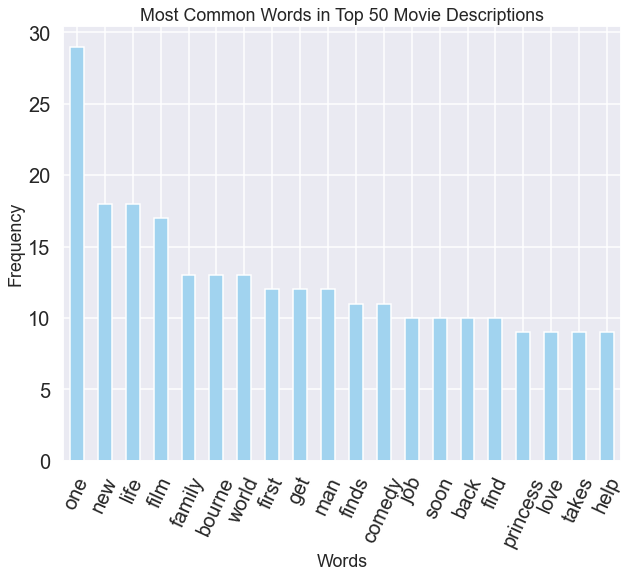

In [32]:
chart_freq.plot(kind = 'bar', 
                title = 'Most Common Words in Top 50 Movie Descriptions',
                xlabel="Words",
                ylabel='Frequency',
                fontsize=20,
                rot = 65)

### Exploring Common Words of Reviews of "Fresh" Movies

In [33]:
# quick look at review data
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,-,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,-,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,-,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,-,fresh,-,0,Cinema Scope,"October 12, 2017"


In [34]:
# make Series of reviews with 'fresh' rating
reviews_best = reviews[reviews['fresh']=='fresh']['review']
reviews_best.head()

0    A distinctly gallows take on contemporary fina...
2    ... life lived in a bubble in financial dealin...
3    Continuing along a line introduced in last yea...
4               ... a perverse twist on neorealism... 
5    ... Cronenberg's Cosmopolis expresses somethin...
Name: review, dtype: object

In [36]:
# making list of words in the synopses of top 50 movies
review_corpus = []
for i in range(len(reviews_best)):
    review_corpus += word_tokenize(reviews_best.iloc[i])
    
# excluding common stop words and punctuation
review_corpus = [x.lower() for x in review_corpus if x.lower() not in stops\
                 and x not in punctuation and x not in words_to_cut]

# making frequency distribution as a dict, then a pandas Series
review_freq = {}
for word in review_corpus:
    if word not in review_freq.keys():
        review_freq[word] = 1
    else:
        review_freq[word] += 1
r_frequencies = pd.Series(review_freq)
chart_review = r_frequencies.sort_values(ascending = False)[:20]


<AxesSubplot:title={'center':'Most Common Words in "Fresh" Movie Reviews'}, xlabel='Words', ylabel='Frequency'>

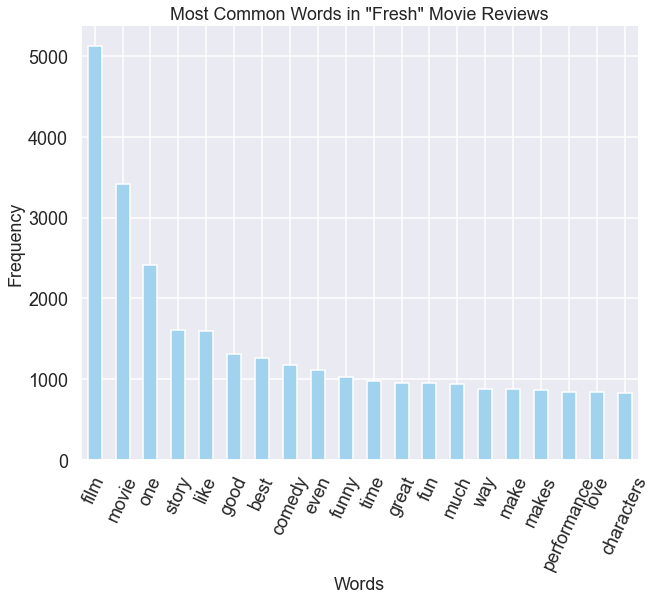

In [37]:
# charting results
chart_review.plot(kind = 'bar', 
                  title = 'Most Common Words in "Fresh" Movie Reviews',
                  xlabel="Words",
                  ylabel='Frequency',
                  fontsize=18,
                  rot = 65)

### Testing for Significance in Sci-fi Fantasy Profit

In [38]:
tmdbMovies['movie'] = tmdbMovies['original_title']
tmdbMovies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genres,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,movie
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"['Adventure', 'Fantasy', 'Family']",...,0,0,0,0,0,0,0,0,0,Harry Potter and the Deathly Hallows: Part 1
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"['Fantasy', 'Adventure', 'Animation', 'Family']",...,0,0,0,0,0,0,0,0,0,How to Train Your Dragon
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"['Adventure', 'Action', 'Science Fiction']",...,0,0,0,0,1,0,0,0,0,Iron Man 2
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"['Animation', 'Comedy', 'Family']",...,0,0,0,0,0,0,0,0,0,Toy Story
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"['Action', 'Science Fiction', 'Adventure']",...,0,0,0,0,1,0,0,0,0,Inception


In [153]:
tmdbMovies = tmdbMovies.drop_duplicates()
tmdbMovies.duplicated().value_counts()

False    25497
dtype: int64

In [39]:
# attempting to merge movieBudgets and tmdbMovies
# to get dataframe with genre and cost and income
df_merged = pd.merge(movieBudgets,tmdbMovies,on=['movie'],how = 'inner')
df_merged.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,id_y,original_language,original_title,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,"[28, 12, 14, 878]",19995,en,Avatar,...,0,0,0,0,0,1,0,0,0,0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,...,0,0,0,0,0,0,0,0,0,0
2,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,...,0,0,0,0,0,1,0,0,0,0
3,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,"[12, 28, 14]",299536,en,Avengers: Infinity War,...,0,0,0,0,0,0,0,0,0,0
4,9,2017-11-17,Justice League,300000000,229024295,655945209,"[28, 12, 14, 878]",141052,en,Justice League,...,0,0,0,0,0,1,0,0,0,0


In [40]:
# seeing how many values are missing in worldwide and domestic gross
df_merged['worldwide_gross'].value_counts()

0            201
385997896      6
44793168       6
95127344       5
42425450       5
            ... 
11295324       1
70165900       1
56445534       1
26387039       1
1521672        1
Name: worldwide_gross, Length: 1789, dtype: int64

In [41]:
# since there are more missing values in domestic, I will use worldwide gross
df_merged['domestic_gross'].value_counts()

0            281
15433          6
177397510      6
1872994        5
41411015       5
            ... 
582024         1
54445357       1
100246011      1
36665854       1
35088320       1
Name: domestic_gross, Length: 1718, dtype: int64

In [42]:
rows_to_drop = df_merged[df_merged['worldwide_gross']==0].index
df_merged=df_merged.drop(rows_to_drop)
df_merged['worldwide_gross'].value_counts()

44793168     6
385997896    6
23506237     5
42425450     5
95127344     5
            ..
11295324     1
70165900     1
56445534     1
26387039     1
76347393     1
Name: worldwide_gross, Length: 1788, dtype: int64

In [43]:
# making column for worldwide profit
df_merged['profit']=df_merged['worldwide_gross']-df_merged['production_budget']
df_merged.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,id_y,original_language,original_title,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,profit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,"[28, 12, 14, 878]",19995,en,Avatar,...,0,0,0,0,1,0,0,0,0,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,...,0,0,0,0,0,0,0,0,0,635063875
2,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,...,0,0,0,0,1,0,0,0,0,1072413963
3,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,"[12, 28, 14]",299536,en,Avengers: Infinity War,...,0,0,0,0,0,0,0,0,0,1748134200
4,9,2017-11-17,Justice League,300000000,229024295,655945209,"[28, 12, 14, 878]",141052,en,Justice League,...,0,0,0,0,1,0,0,0,0,355945209


In [48]:
# making Series of the profits of sci-fi fantasy movies
sff_profits = df_merged[(df_merged['Science Fiction']==1)\
                        |(df_merged['Fantasy']==1)]['profit']
# making Series of the profits of all movies
all_profits = df_merged['profit']

Null Hypothesis:
    There is no difference in profits in Sci-Fi and Fantasy movies from the population

Alternative Hypothesis:
    Profits of Sci-fi and Fantasy movies are higher than the population
    
alpha = 0.01

99% confidence

In [49]:
# calculating z statistic
mu = all_profits.mean()
x_bar = sff_profits.mean()
sigma = np.std(all_profits)
n = len(sff_profits)

z= (x_bar - mu)/(sigma/math.sqrt(n))
z

11.584388791529001

In [50]:
# calculating p-value
stats.norm.cdf(z)
pval = 1- stats.norm.cdf(z)
pval

0.0

In [51]:
print(f'Average Profit of All Films: {mu}')
print(f'Average Profit of Sci-fi and Fantasy Films: {x_bar}')

Average Profit of All Films: 90514652.86619386
Average Profit of Sci-fi and Fantasy Films: 196565387.4627907


I reject the null hypothesis with a 99% confidence level

# Conclusions

This analysis leads to three recommendations for Computing Vision as they move into the film industry:

# Next Steps